In [41]:
import pandas as pd
import altair as alt

In [2]:
shipments = pd.read_parquet(
    "C:\\Users\\nicho\\Documents\\GitHub\\pds-2022-grey-team\\20_Intermediate_Files\\shipmentFL.parquet"
)

In [3]:
shipments["Converted Units"] = (
    shipments["CALC_BASE_WT_IN_GM"] * 1000 * shipments["MME_Conversion_Factor"]
)


In [26]:
shipments.loc[:, 'Year'] = shipments.loc[:, "TRANSACTION_DATE"].dt.year

In [30]:
groupedShipments = shipments.groupby(['BUYER_STATE', 'BUYER_COUNTY', 'Year'], as_index = False).sum()

C:\Users\nicho\AppData\Local\Temp\ipykernel_22956\288420994.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  groupedShipments = shipments.groupby(['BUYER_STATE', 'BUYER_COUNTY', 'Year'], as_index = False).sum()


In [4]:
census00s = pd.read_csv(
    "C:\\Users\\nicho\\Documents\\GitHub\\pds-2022-grey-team\\00_Source\\Population\\population2000-2010.csv",
    usecols=[
        "STNAME",
        "CTYNAME",
        "POPESTIMATE2000",
        "POPESTIMATE2001",
        "POPESTIMATE2002",
        "POPESTIMATE2003",
        "POPESTIMATE2004",
        "POPESTIMATE2005",
        "POPESTIMATE2006",
        "POPESTIMATE2007",
        "POPESTIMATE2008",
        "POPESTIMATE2009",
    ],
    encoding_errors="replace",
)

In [5]:
census00s

,STNAME,CTYNAME,POPESTIMATE2000,POPESTIMATE2001,POPESTIMATE2002,POPESTIMATE2003,POPESTIMATE2004,POPESTIMATE2005,POPESTIMATE2006,POPESTIMATE2007,POPESTIMATE2008,POPESTIMATE2009
0,Alabama,Alabama,4452173,4467634,4480089,4503491,4530729,4569805,4628981,4672840,4718206,4757938
1,Alabama,Autauga County,44021,44889,45909,46800,48366,49676,51328,52405,53277,54135
2,Alabama,Baldwin County,141342,144875,147957,151509,156266,162183,168121,172404,175827,179406
3,Alabama,Barbour County,29015,28863,28653,28594,28287,28027,27861,27757,27808,27657
4,Alabama,Bibb County,19913,21028,21199,21399,21721,22042,22099,22438,22705,22941
...,...,...,...,...,...,...,...,...,...,...,...,...
3189,Wyoming,Sweetwater County,37552,36899,37428,37450,38026,38739,39749,41470,42358,44133
3190,Wyoming,Teton County,18381,18653,18837,19066,19467,19632,20014,20472,20988,21232
3191,Wyoming,Uinta County,19666,19413,19587,19480,19470,19494,19709,20171,20613,21054
3192,Wyoming,Washakie County,8252,8068,7988,7976,7960,8022,7979,8169,8229,8423


In [6]:
census10s = pd.read_csv(
    "C:\\Users\\nicho\\Documents\\GitHub\\pds-2022-grey-team\\00_Source\\Population\\population2010-2020.csv",
    usecols=[
        "STNAME",
        "CTYNAME",
        "CENSUS2010POP",
        "POPESTIMATE2011",
        "POPESTIMATE2012",
        "POPESTIMATE2013",
        "POPESTIMATE2014",
        "POPESTIMATE2015",
        "POPESTIMATE2016",
        "POPESTIMATE2017",
        "POPESTIMATE2018",
        "POPESTIMATE2019",
        "POPESTIMATE2020",
    ],
    encoding_errors="replace",
)

In [7]:
census = census00s.merge(census10s, on=["STNAME", "CTYNAME"])


In [8]:
census

,STNAME,CTYNAME,POPESTIMATE2000,POPESTIMATE2001,POPESTIMATE2002,POPESTIMATE2003,POPESTIMATE2004,POPESTIMATE2005,POPESTIMATE2006,POPESTIMATE2007,...,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014,POPESTIMATE2015,POPESTIMATE2016,POPESTIMATE2017,POPESTIMATE2018,POPESTIMATE2019,POPESTIMATE2020
0,Alabama,Alabama,4452173,4467634,4480089,4503491,4530729,4569805,4628981,4672840,...,4799642,4816632,4831586,4843737,4854803,4866824,4877989,4891628,4907965,4921532
1,Alabama,Autauga County,44021,44889,45909,46800,48366,49676,51328,52405,...,55229,54970,54747,54922,54903,55302,55448,55533,55769,56145
2,Alabama,Baldwin County,141342,144875,147957,151509,156266,162183,168121,172404,...,186579,190203,194978,199306,203101,207787,212737,218071,223565,229287
3,Alabama,Barbour County,29015,28863,28653,28594,28287,28027,27861,27757,...,27344,27172,26946,26768,26300,25828,25169,24887,24657,24589
4,Alabama,Bibb County,19913,21028,21199,21399,21721,22042,22099,22438,...,22736,22657,22510,22541,22553,22590,22532,22300,22313,22136
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3185,Wyoming,Sweetwater County,37552,36899,37428,37450,38026,38739,39749,41470,...,44000,45032,45189,44996,44780,44319,43663,43188,42917,42673
3186,Wyoming,Teton County,18381,18653,18837,19066,19467,19632,20014,20472,...,21422,21643,22335,22801,23083,23255,23383,23261,23385,23497
3187,Wyoming,Uinta County,19666,19413,19587,19480,19470,19494,19709,20171,...,20901,21008,20969,20835,20777,20711,20449,20299,20196,20215
3188,Wyoming,Washakie County,8252,8068,7988,7976,7960,8022,7979,8169,...,8451,8410,8417,8277,8282,8180,8013,7886,7824,7760


In [9]:
abbreviations = pd.read_html(
    "https://simple.wikipedia.org/wiki/List_of_U.S._states_by_traditional_abbreviation"
)[0]
abbreviations

,State,Traditional abbreviation,Other abbreviations
0,Alabama,Ala.,AL
1,Alaska,Alaska,AK
2,Arizona,Ariz.,AZ
3,Arkansas,Ark.,AR
4,California,Calif.,CA
5,Colorado,Colo.,CO
6,Connecticut,Conn.,CT
7,Delaware,Del.,DE
8,District of Columbia,D.C.,DC
9,Florida,Fla.,FL


In [10]:
census = census.merge(
    abbreviations[["State", "Other abbreviations"]],
    how="left",
    left_on="STNAME",
    right_on="State",
)

In [11]:
def updateName(x):
    y = x.split()
    if y[-1] == "County":
        z = y[0]
        if len(y[-1]) > 1:
            for word in y[1:-1]:
                z += " " + word
        return z.upper()
    else:
        return x.upper()

In [12]:
census["County"] = census.loc[:, "CTYNAME"].apply(updateName)

In [13]:
census.columns

Index(['STNAME', 'CTYNAME', 'POPESTIMATE2000', 'POPESTIMATE2001',
       'POPESTIMATE2002', 'POPESTIMATE2003', 'POPESTIMATE2004',
       'POPESTIMATE2005', 'POPESTIMATE2006', 'POPESTIMATE2007',
       'POPESTIMATE2008', 'POPESTIMATE2009', 'CENSUS2010POP',
       'POPESTIMATE2011', 'POPESTIMATE2012', 'POPESTIMATE2013',
       'POPESTIMATE2014', 'POPESTIMATE2015', 'POPESTIMATE2016',
       'POPESTIMATE2017', 'POPESTIMATE2018', 'POPESTIMATE2019',
       'POPESTIMATE2020', 'State', 'Other abbreviations', 'County'],
      dtype='object')

In [14]:
census = census.rename(
    columns={
        "POPESTIMATE2000": 2000,
        "POPESTIMATE2001": 2001,
        "POPESTIMATE2002": 2002,
        "POPESTIMATE2003": 2003,
        "POPESTIMATE2004": 2004,
        "POPESTIMATE2005": 2005,
        "POPESTIMATE2006": 2006,
        "POPESTIMATE2007": 2007,
        "POPESTIMATE2008": 2008,
        "POPESTIMATE2009": 2009,
        "CENSUS2010POP": 2010,
        "POPESTIMATE2011": 2011,
        "POPESTIMATE2012": 2012,
        "POPESTIMATE2013": 2013,
        "POPESTIMATE2014": 2014,
        "POPESTIMATE2015": 2015,
        "POPESTIMATE2016": 2016,
        "POPESTIMATE2017": 2017,
        "POPESTIMATE2018": 2018,
        "POPESTIMATE2019": 2019,
        "POPESTIMATE2020": 2020,
    }
)


In [15]:
census = census.melt(
    id_vars=["STNAME", "CTYNAME", "State", "Other abbreviations", "County"],
    value_vars=[
        2000,
        2001,
        2002,
        2003,
        2004,
        2005,
        2006,
        2007,
        2008,
        2009,
        2010,
        2011,
        2012,
        2013,
        2014,
        2015,
        2016,
        2017,
        2018,
        2019,
        2020,
    ],
    var_name="Year",
    value_name="Population",
)

In [35]:
census['Population'] = census['Population'].astype(int)


In [24]:
census.loc[census.loc[:, "State"] == "Florida", :]

,STNAME,CTYNAME,State,Other abbreviations,County,Year,Population
328,Florida,Florida,Florida,FL,FLORIDA,2000,16047515
329,Florida,Alachua County,Florida,FL,ALACHUA,2000,218611
330,Florida,Baker County,Florida,FL,BAKER,2000,22374
331,Florida,Bay County,Florida,FL,BAY,2000,148393
332,Florida,Bradford County,Florida,FL,BRADFORD,2000,26064
...,...,...,...,...,...,...,...
64191,Florida,Union County,Florida,FL,UNION,2020,15182
64192,Florida,Volusia County,Florida,FL,VOLUSIA,2020,561497
64193,Florida,Wakulla County,Florida,FL,WAKULLA,2020,34319
64194,Florida,Walton County,Florida,FL,WALTON,2020,76648


In [36]:
mergedDF = pd.DataFrame()
for year in range(2000, 2021):
    yearDF = groupedShipments.merge(
        census,
        how="left",
        left_on=["BUYER_STATE", "BUYER_COUNTY", "Year"],
        right_on=["Other abbreviations", "County", "Year"],
    )
    mergedDF = pd.concat([mergedDF, yearDF], axis=0)

In [37]:
mergedDF['Opioids per Capita'] = mergedDF['Converted Units'] / mergedDF['Population']

C:\Users\nicho\AppData\Local\Temp\ipykernel_22956\3264575499.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mergedDF.groupby(['BUYER_STATE', 'Year'], as_index = False).mean().plot(x = 'Year', y = 'Opioids per Capita')


<AxesSubplot: xlabel='Year'>

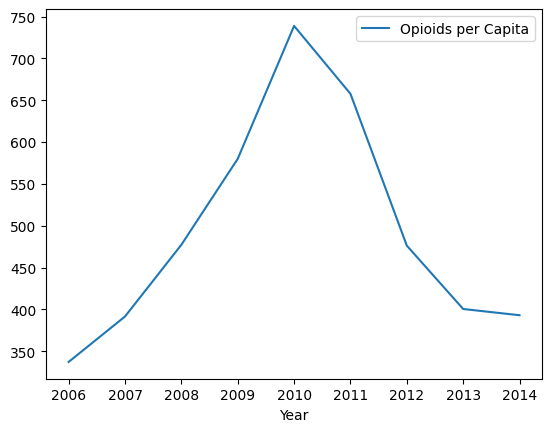

In [42]:
mergedDF.groupby(['BUYER_STATE', 'Year'], as_index = False).mean().plot(x = 'Year', y = 'Opioids per Capita')

In [10]:
with pd.read_csv(
    "C:\\Users\\nicho\\Documents\\GitHub\\pds-2022-grey-team\\00_Source\\Population\\population2010-2020.csv",
    # delimiter="\t",
    chunksize=1000,
    iterator=True,
    low_memory=False,
    # usecols=[
    #     "BUYER_STATE",
    #     "BUYER_COUNTY",
    #     "QUANTITY",
    #     "NDC_NO",
    #     "DRUG_NAME",
    #     "TRANSACTION_DATE",
    #     "UNIT",
    #     "STRENGTH",
    #     "DOSAGE_UNIT",
    #     "CALC_BASE_WT_IN_GM",
    #     "MME_Conversion_Factor",
    #     "Measure",
    #     "dos_str",
    # ],
    # parse_dates=["TRANSACTION_DATE"],
) as reader:
    for chunk in reader:
        print(chunk)
# census20s = pd.read_csv("C:\\Users\\nicho\\Documents\\GitHub\\pds-2022-grey-team\\00_Source\\Population\\population2010-2020.csv")


     SUMLEV  REGION  DIVISION  STATE  COUNTY   STNAME          CTYNAME  \
0        40       3         6      1       0  Alabama          Alabama   
1        50       3         6      1       1  Alabama   Autauga County   
2        50       3         6      1       3  Alabama   Baldwin County   
3        50       3         6      1       5  Alabama   Barbour County   
4        50       3         6      1       7  Alabama      Bibb County   
..      ...     ...       ...    ...     ...      ...              ...   
995      50       2         4     20     179   Kansas  Sheridan County   
996      50       2         4     20     181   Kansas   Sherman County   
997      50       2         4     20     183   Kansas     Smith County   
998      50       2         4     20     185   Kansas  Stafford County   
999      50       2         4     20     187   Kansas   Stanton County   

    CENSUS2010POP  ESTIMATESBASE2010  POPESTIMATE2010  ...  RNETMIG2011  \
0         4779736            4780118

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf1 in position 202307: invalid continuation byte